<a href="https://colab.research.google.com/github/vincm1/Car-price-prediction/blob/master/Car_Price_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Predictor

This Colaboratory will try to find an appropriate model to predict prices of used cars. The datasets used are from Kaggle and as follows:



*  Car Prediciton Challenge [19.237 entries] (https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?datasetId=2322277&sortBy=voteCount)
*   Autouscout24 cars



In [239]:
from google.colab import drive
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car Price Predictor/datasets/car_price_prediction.csv', delimiter=",")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [20]:
df_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Car Price Predictor/datasets/autoscout24-germany-dataset.csv", delimiter=",")

In [21]:
df_2.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [22]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [24]:
print(f"There are {len(df)} car entries in the df")

There are 19237 car entries in the df


In [25]:
print(f"There are {len(df_2)} car entries in the df")

There are 46405 car entries in the df


In [26]:
df.shape

(19237, 18)

In [27]:
df_2.shape

(46405, 9)

In [28]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [29]:
df_2.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [30]:
df_2_cleaned = df_2.dropna(subset=['model', 'gear', 'hp'])

In [ ]:
df['ID'].duplicated().sum()

313

In [41]:
len(df_2_cleaned)

46071

In [43]:
df_2_cleaned.drop_duplicates(inplace=True)

<ipython-input-43-d05018a61ea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_cleaned.drop_duplicates(inplace=True)


In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df_2_cleaned.duplicated().sum()

0

# Data Cleaning and Preprocessing

In [46]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('*'*75)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
***************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
***************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798'

In [49]:
for col in df_2_cleaned.columns:
    print(col)
    print(df_2_cleaned[f'{col}'].unique())
    print('*'*75)

mileage
[235000  92800 149300 ...   7612    550    837]
***************************************************************************
make
['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Mitsubishi' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru' 'Dodge' 'Microcar'
 'Lamborghini' 'Lada' 'Tesla' 'Chrysler' 'McLaren' 'Aston' 'Rolls-Royce'
 'Lancia' 'Abarth' 'DS' 'Daihatsu' 'Ligier' 'Ferrari' 'Aixam' 'Zhidou'
 'Morgan' 'Maybach' 'RAM' 'Alpina' 'Polestar' 'Brilliance' 'Piaggio'
 'FISKER' 'Others' 'Cadillac' 'Iveco' 'Isuzu' 'Corvette' 'Baic' 'DFSK'
 'Estrima' 'Alpine']
***************************************************************************
model
['316' 'Golf' 'Exeo' 'Megane' '308' 'Auris' 'Scenic' 'Zafira' '3'
 'Transit' 'Meriva' 'E 250' 'Orlando' 'A4' 'Polo' 'Esp

In [53]:
df_2_cleaned = df_2_cleaned[df_2_cleaned["fuel"] != "-/- (Fuel)"]

In [54]:
# Replacing '-' with null
df['Levy'].replace({'-':np.nan}, inplace = True)
# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')

In [55]:
# drop km in mileage
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = df['Mileage'].astype('int64')

In [56]:
# replace doors
df['Doors'].replace({'04-May':'4-5', '02-Mar':'2-3'}, inplace=True)

In [57]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()

# Finding the rows which has turbo in them and assigning the results to new column Turbo.
df['Turbo'] = df['Engine volume'].str.contains('turbo')

# Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

In [58]:
# Replacement: Yes >> True , No >> False
df['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18924.0,4.557538e+07,9.375468e+05,20746880.0,45695007.50,45771914.5,45801742.25,4.581665e+07
Price,18924.0,1.858744e+04,1.921356e+05,1.0,5331.00,13172.0,22063.00,2.630750e+07
Levy,13215.0,9.062992e+02,4.632969e+02,87.0,640.00,781.0,1058.00,1.171400e+04
Prod. year,18924.0,2.010914e+03,5.665749e+00,1939.0,2009.00,2012.0,2015.00,2.020000e+03
Engine volume,18924.0,2.306251e+00,8.775910e-01,0.0,1.80,2.0,2.50,2.000000e+01
Mileage,18924.0,1.555373e+06,4.880221e+07,0.0,70195.75,126400.0,189119.75,2.147484e+09
Cylinders,18924.0,4.580216e+00,1.200223e+00,1.0,4.00,4.0,4.00,1.600000e+01
Airbags,18924.0,6.568379e+00,4.322323e+00,0.0,4.00,6.0,12.00,1.600000e+01


In [62]:
df_2_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,43927.0,72311.401279,62178.955200,0.0,21500.0,61309.0,106000.0,1111111.0
price,43927.0,16548.148997,19448.607291,1100.0,7490.0,10990.0,19490.0,1199900.0
hp,43927.0,133.626289,75.034205,1.0,86.0,116.0,150.0,850.0
year,43927.0,2015.931591,3.120292,2011.0,2013.0,2016.0,2019.0,2021.0


In [108]:
df_2_cleaned = df_2_cleaned[df_2_cleaned.price < 1000000]

In [63]:
df['Levy'].fillna(df['Levy'].median(), inplace=True)

In [77]:
def detect_outliers(df,features,thold):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)


    return outlier_indices

In [78]:
features = ['Price','Levy', 'Mileage']
outliers = detect_outliers(df,features, 1.5)
deleted_df = df.drop(df.loc[outliers].index,axis=0)

In [79]:
cars = deleted_df
print(f"{len(df)}, {len(cars)}")

18924, 14447


In [80]:
cars = deleted_df[['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo']].copy()

In [112]:
features = ['price','mileage']
outliers = detect_outliers(df_2_cleaned,features, 1.5)
cars_2 = df_2_cleaned.drop(df_2_cleaned.loc[outliers].index,axis=0)

In [125]:
cars_2

,mileage,make,model,fuel,gear,offerType,price,hp,year
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021


# EDA

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Levy'}>,
        <Axes: title={'center': 'Prod. year'}>],
       [<Axes: title={'center': 'Engine volume'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Airbags'}>, <Axes: >, <Axes: >]],
      dtype=object)

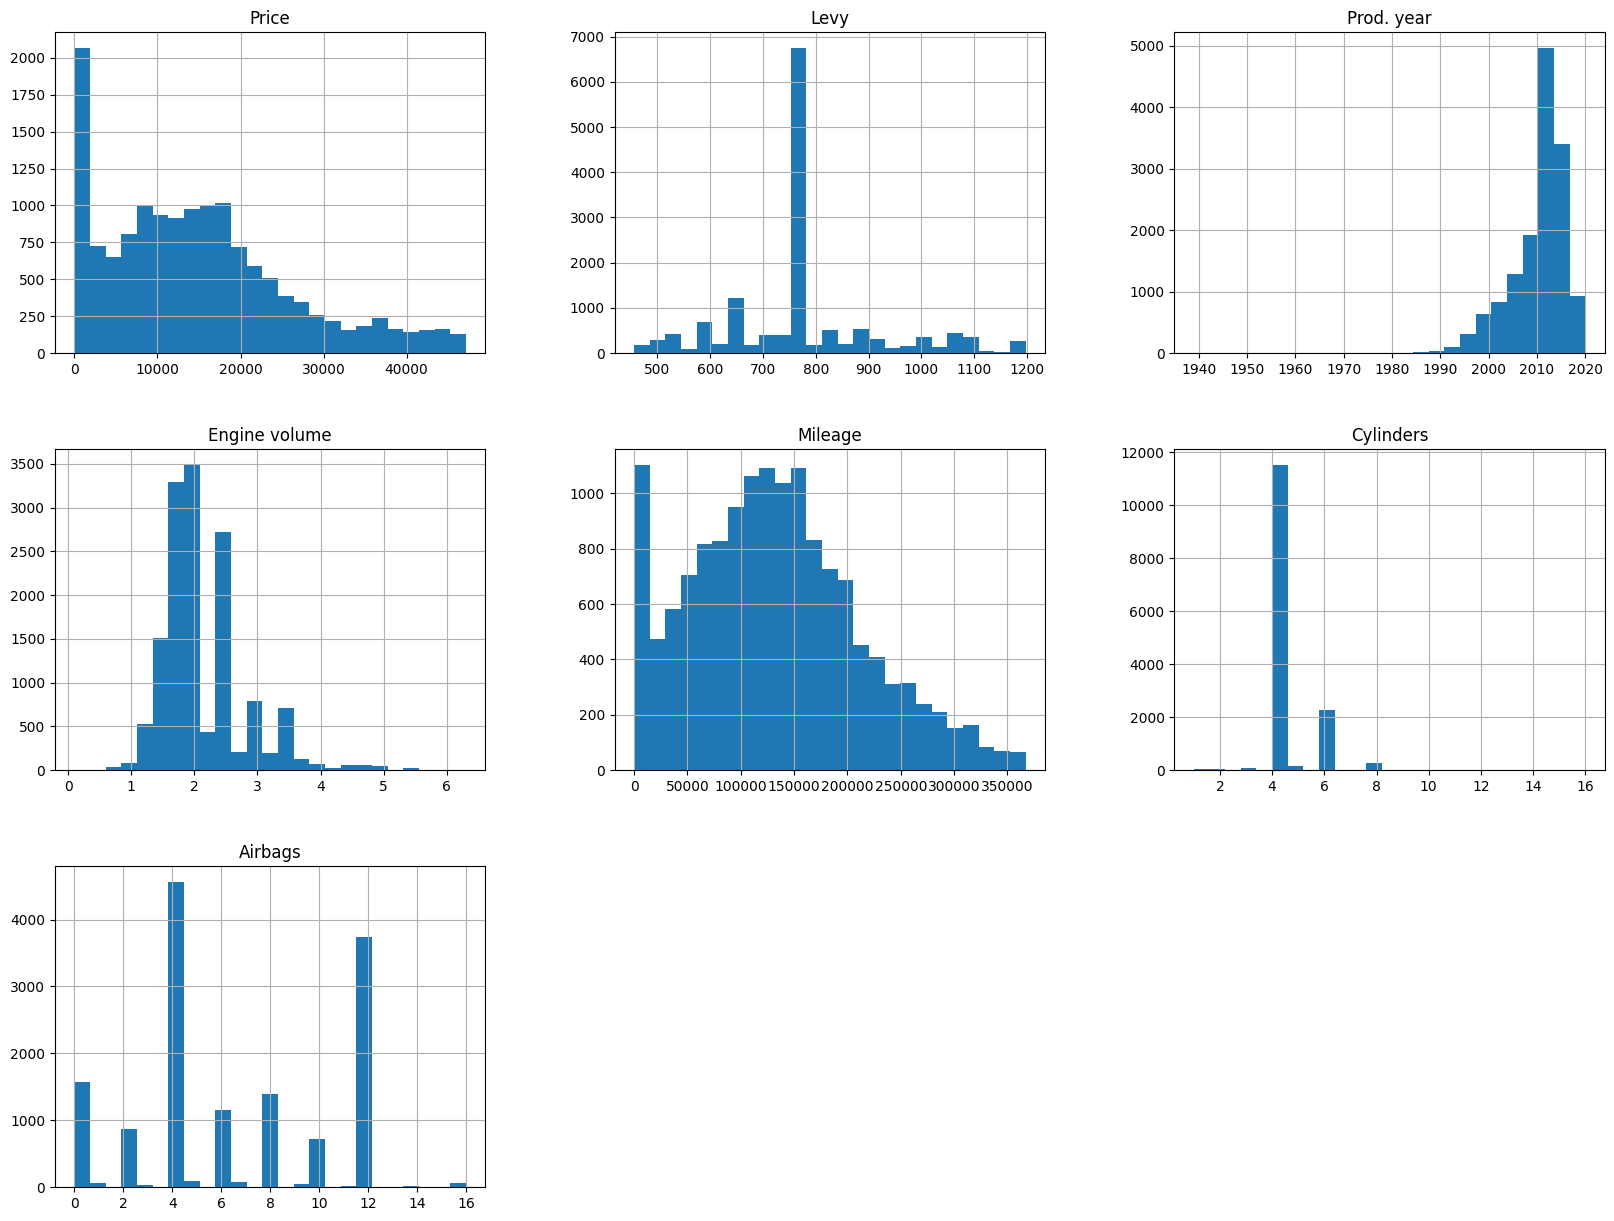

In [82]:
cars.hist(bins=25, figsize=(20,15))

array([[<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'year'}>]],
      dtype=object)

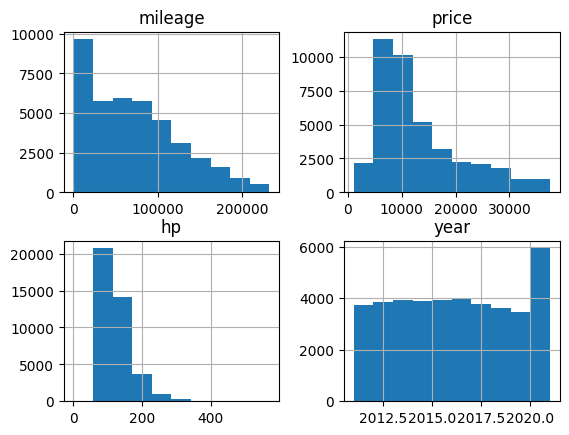

In [113]:
cars_2.hist()

In [114]:
cars_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40080 entries, 1 to 46399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    40080 non-null  int64  
 1   make       40080 non-null  object 
 2   model      40080 non-null  object 
 3   fuel       40080 non-null  object 
 4   gear       40080 non-null  object 
 5   offerType  40080 non-null  object 
 6   price      40080 non-null  int64  
 7   hp         40080 non-null  float64
 8   year       40080 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.1+ MB


In [86]:
print(f"Min price: {cars.Price.min()}, Max price: {cars.Price.max()} and range: {cars.Price.max()-cars.Price.min()}")

Min price: 1, Max price: 47120 and range: 47119


In [87]:
print(f"Min Mileage: {cars.Mileage.min()}, Max mileage: {cars.Mileage.max()} and range: {cars.Mileage.max()-cars.Mileage.min()}")

Min Mileage: 0, Max mileage: 367000 and range: 367000


## Numeric Vars

There are some outliers in price and mileage within the data

In [88]:
print(f"Average price: {cars.Price.mean()}; Average mileage: {cars.Mileage.mean()}")

Average price: 14860.21921506195; Average mileage: 131611.4550425694


### Levy
Levy is a tax related term. Tax of importing and exporting the cars.

<Axes: xlabel='Levy', ylabel='Density'>

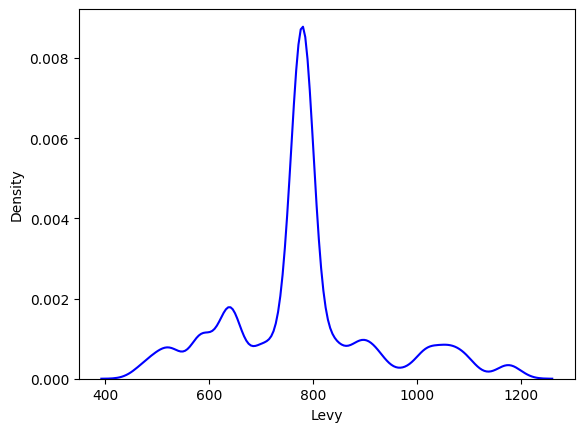

In [89]:
sns.kdeplot(cars['Levy'], color='b')

### Airbags

<Axes: xlabel='Airbags', ylabel='Density'>

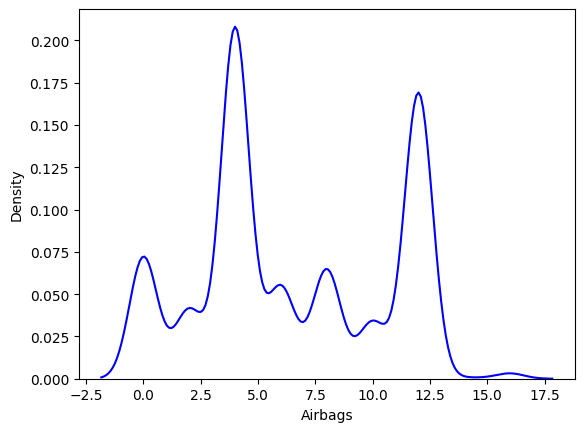

In [90]:
sns.kdeplot(cars['Airbags'], color='b')

### Cylinders

<Axes: xlabel='Cylinders', ylabel='Density'>

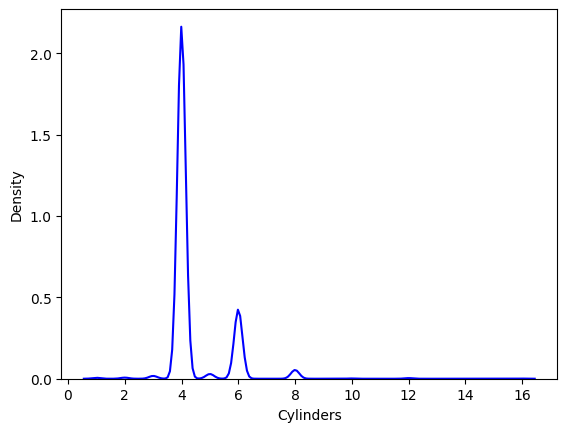

In [91]:
sns.kdeplot(cars['Cylinders'], color='b')

In [92]:
cars_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43927 entries, 0 to 46399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    43927 non-null  int64  
 1   make       43927 non-null  object 
 2   model      43927 non-null  object 
 3   fuel       43927 non-null  object 
 4   gear       43927 non-null  object 
 5   offerType  43927 non-null  object 
 6   price      43927 non-null  int64  
 7   hp         43927 non-null  float64
 8   year       43927 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


<Axes: xlabel='mileage', ylabel='Density'>

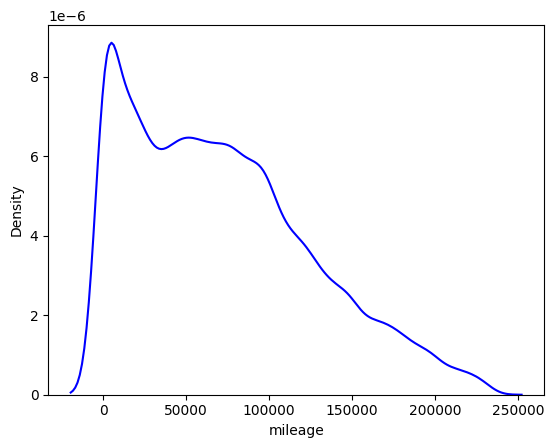

In [115]:
sns.kdeplot(cars_2['mileage'], color='b')

<Axes: xlabel='price', ylabel='Density'>

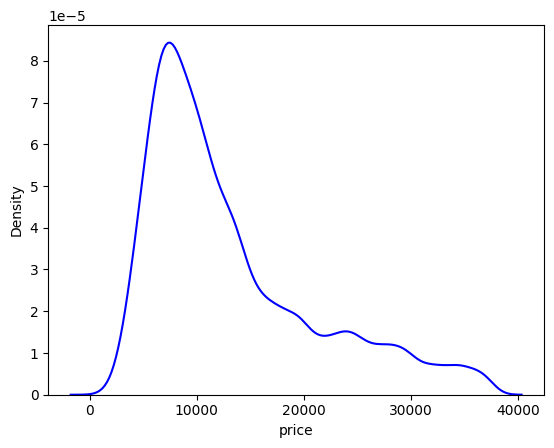

In [116]:
sns.kdeplot(cars_2['price'], color='b')

<Axes: xlabel='hp', ylabel='Density'>

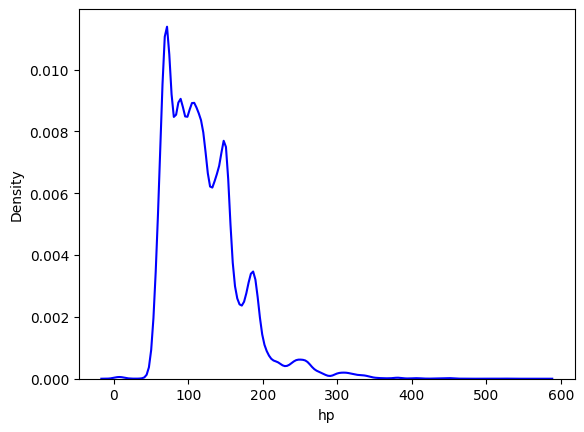

In [117]:
sns.kdeplot(cars_2['hp'], color='b')

In [118]:
len(cars_2)

40080

## Categoric Vars

Text(0.5, 1.0, '# of Brand')

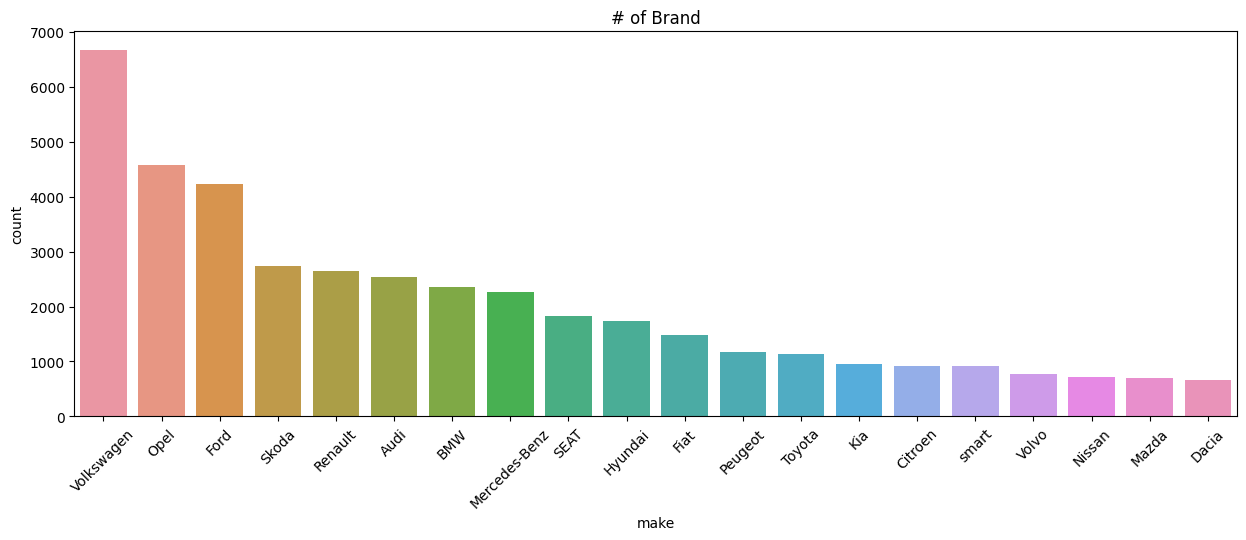

In [100]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = cars_2['make'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=cars_2, x='make', order=category_counts[:20])
plt.xticks(rotation=45)
plt.title("# of Brand")

Text(0.5, 1.0, '# of Brand')

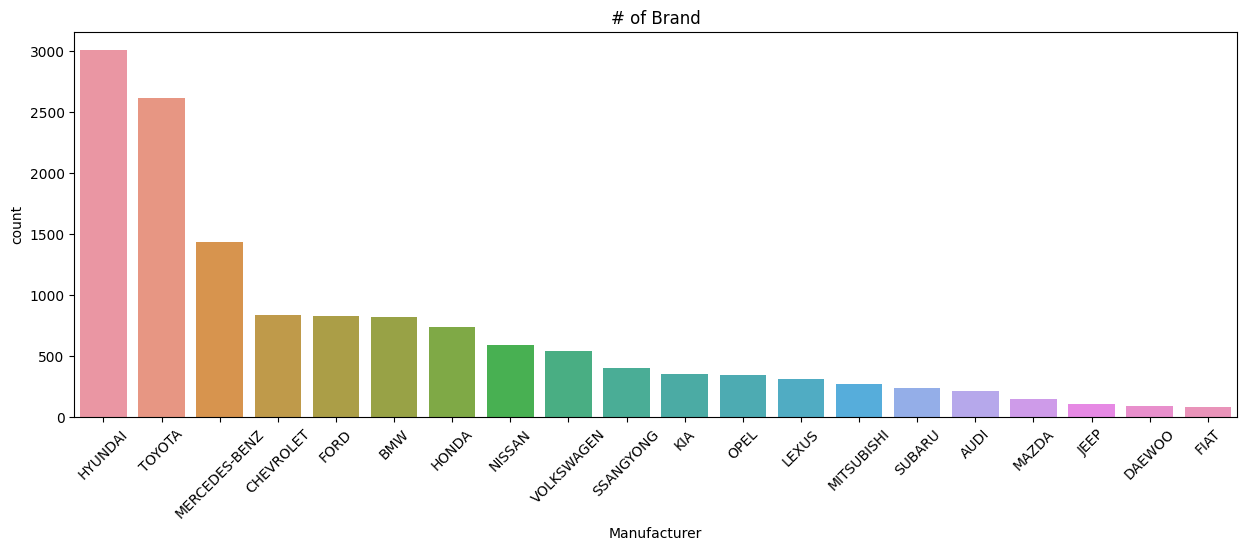

In [119]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = cars['Manufacturer'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=cars, x='Manufacturer', order=category_counts[:20])
plt.xticks(rotation=45)
plt.title("# of Brand")

Text(0.5, 1.0, '# of Gear box type')

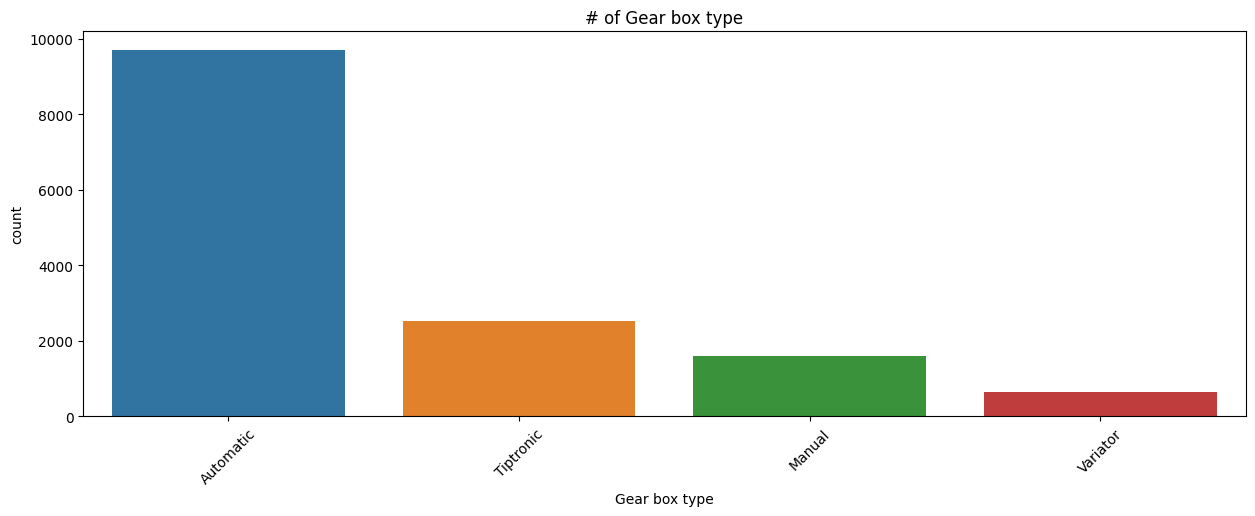

In [120]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = cars['Gear box type'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=cars, x='Gear box type', order=category_counts)
plt.xticks(rotation=45)
plt.title("# of Gear box type")

In [ ]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = cars['Gear box type'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=cars, x='Gear box type', order=category_counts)
plt.xticks(rotation=45)
plt.title("# of Gear box type")

Text(0.5, 1.0, '# of leather')

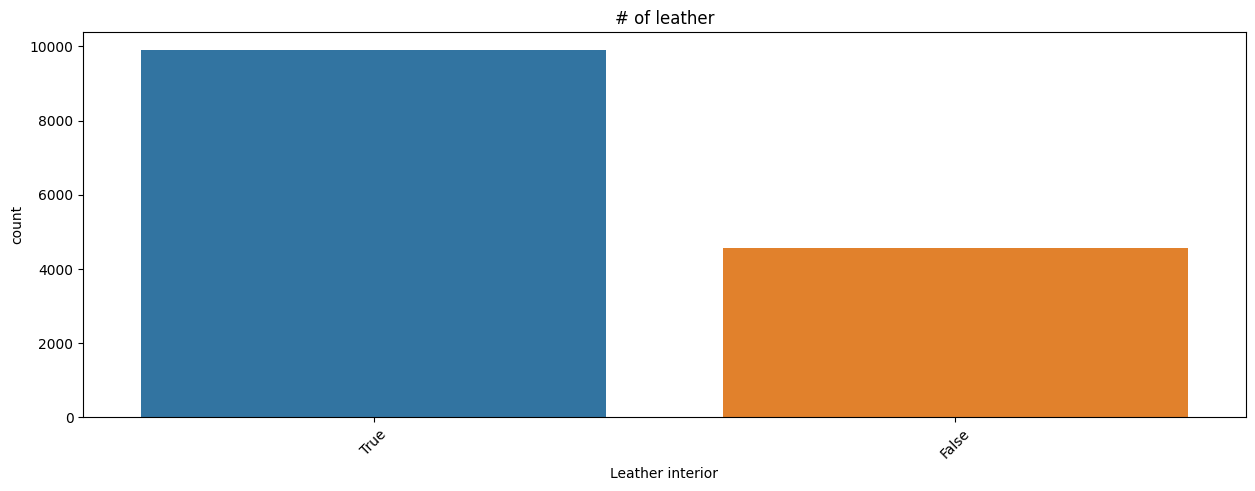

In [ ]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = cars['Leather interior'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=cars, x='Leather interior', order=category_counts)
plt.xticks(rotation=45)
plt.title("# of leather")

Text(0.5, 1.0, '# of Model')

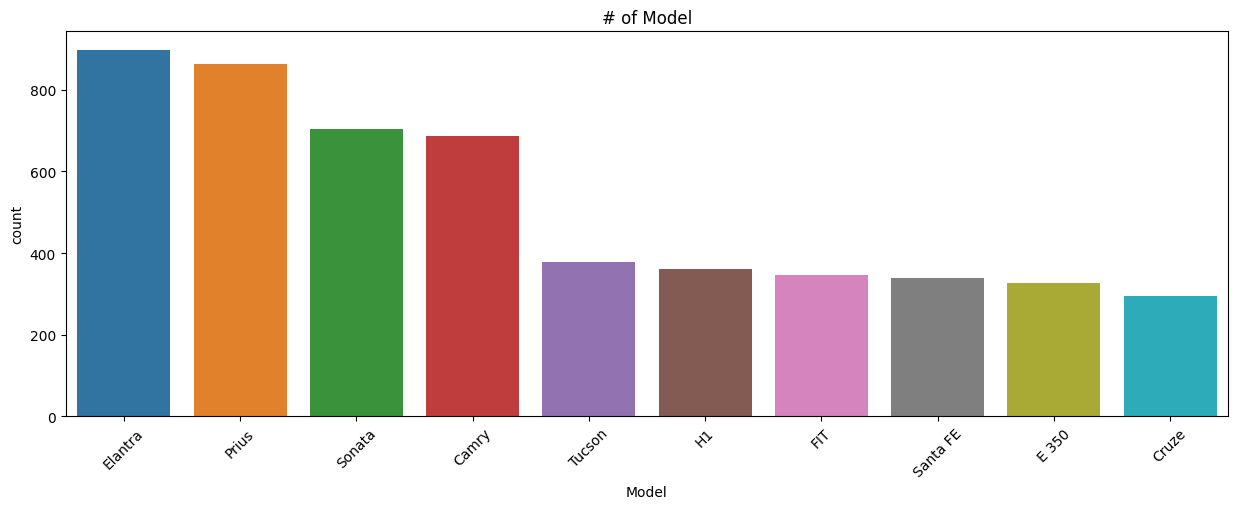

In [ ]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = cars['Model'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=cars, x='Model', order=category_counts[:10])
plt.xticks(rotation=45)
plt.title("# of Model")

Text(0.5, 1.0, '# of color')

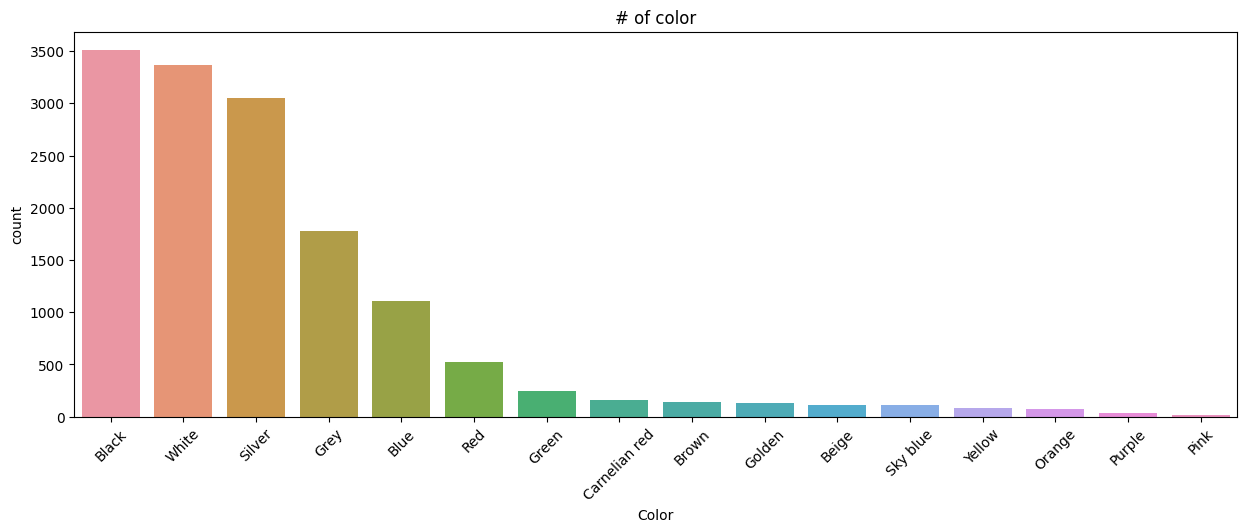

In [ ]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = cars['Color'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=cars, x='Color', order=category_counts)
plt.xticks(rotation=45)
plt.title("# of color")

Text(0.5, 1.0, '# of Doors')

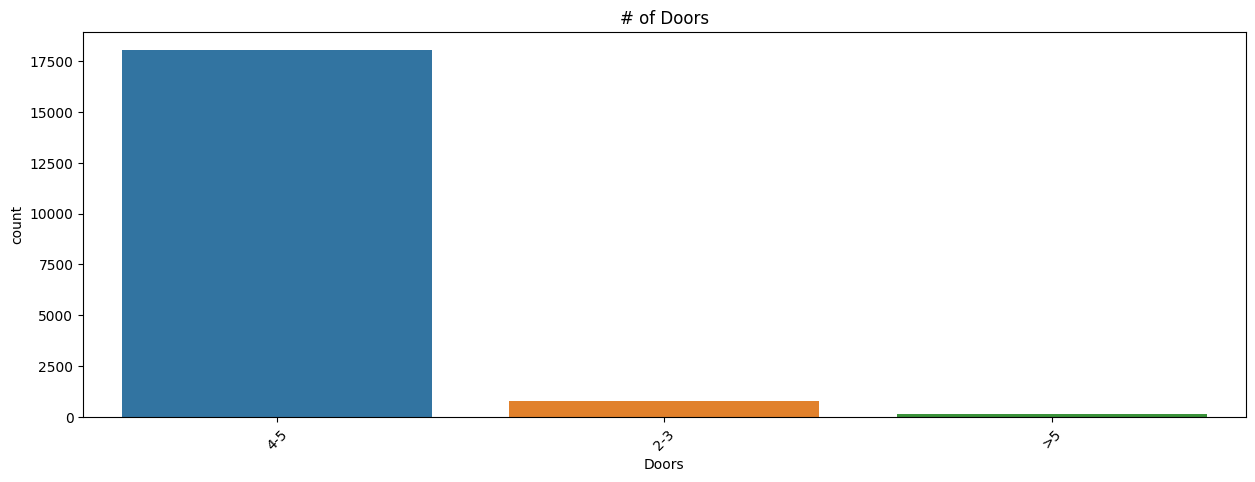

In [ ]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = df['Doors'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=df, x='Doors', order=category_counts)
plt.xticks(rotation=45)
plt.title("# of Doors")

Text(0.5, 1.0, '# fuel')

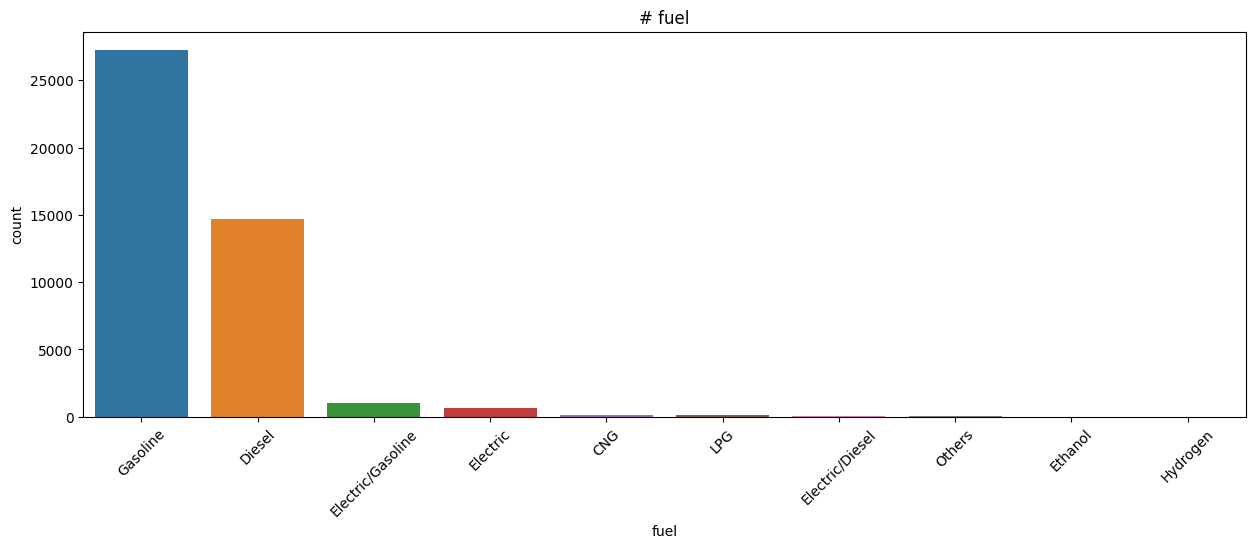

In [102]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = cars_2['fuel'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=cars_2, x='fuel', order=category_counts)
plt.xticks(rotation=45)
plt.title("# fuel")

## Correlation Heatmap

<ipython-input-121-87a82c4aeb0d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars.corr(), annot=True, cbar=True, cmap=cmap)


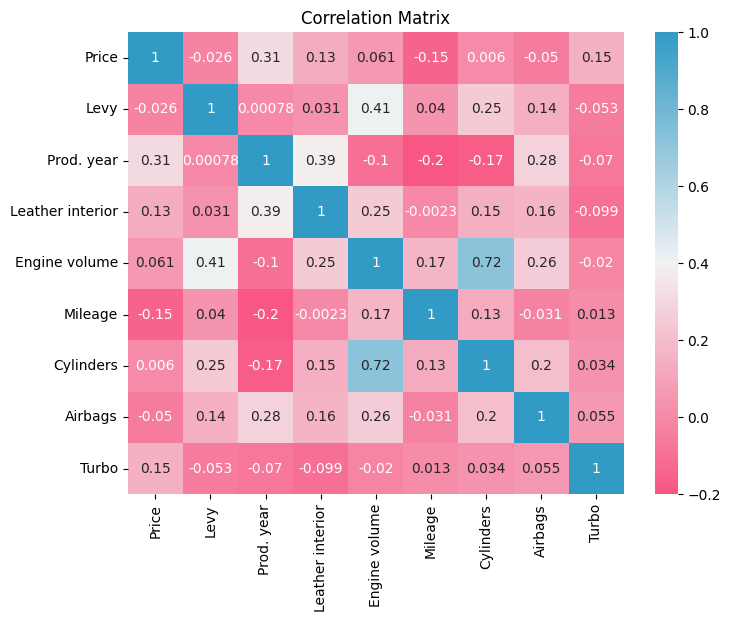

In [121]:
plt.figure(figsize=(8,6))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(cars.corr(), annot=True, cbar=True, cmap=cmap)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-126-9c5de1e4eb8e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars_2.corr(), annot=True, cbar=True, cmap=cmap)


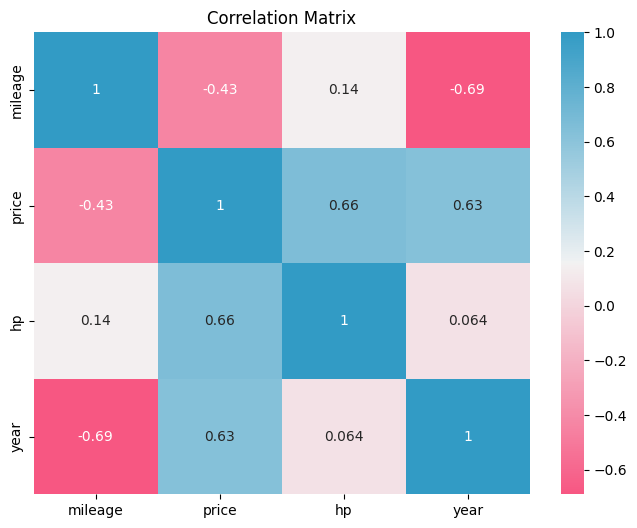

In [126]:
plt.figure(figsize=(8,6))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(cars_2.corr(), annot=True, cbar=True, cmap=cmap)
plt.title('Correlation Matrix')
plt.show()

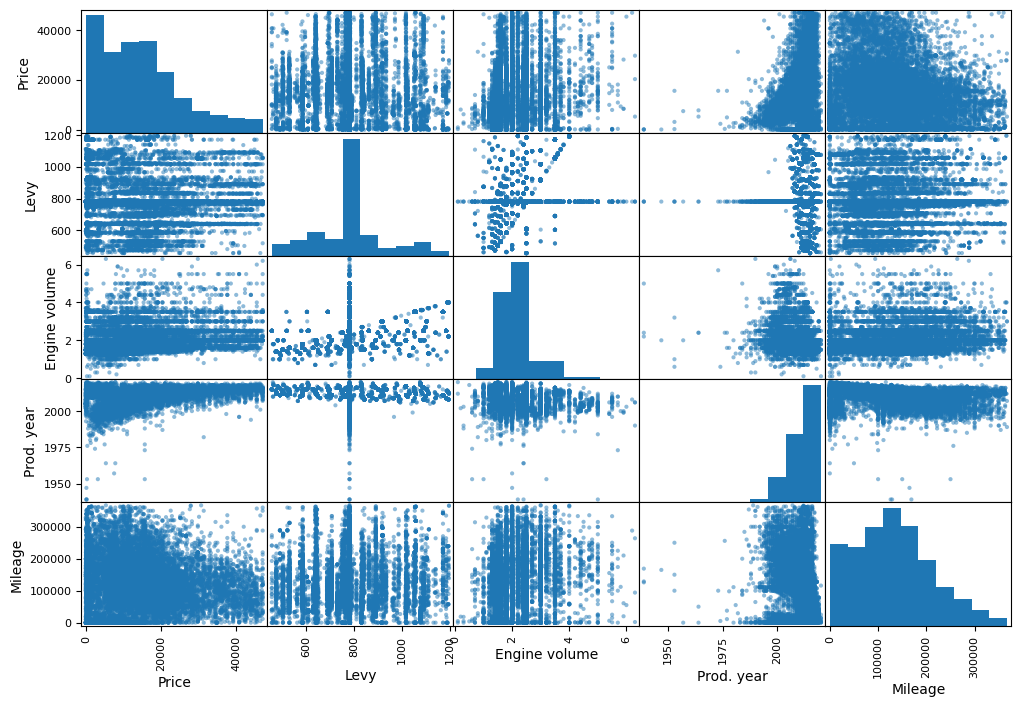

In [106]:
from pandas.plotting import scatter_matrix
attributes = ['Price','Levy','Engine volume','Prod. year','Mileage']
scatter_matrix(cars[attributes], figsize=(12,8))
plt.show()

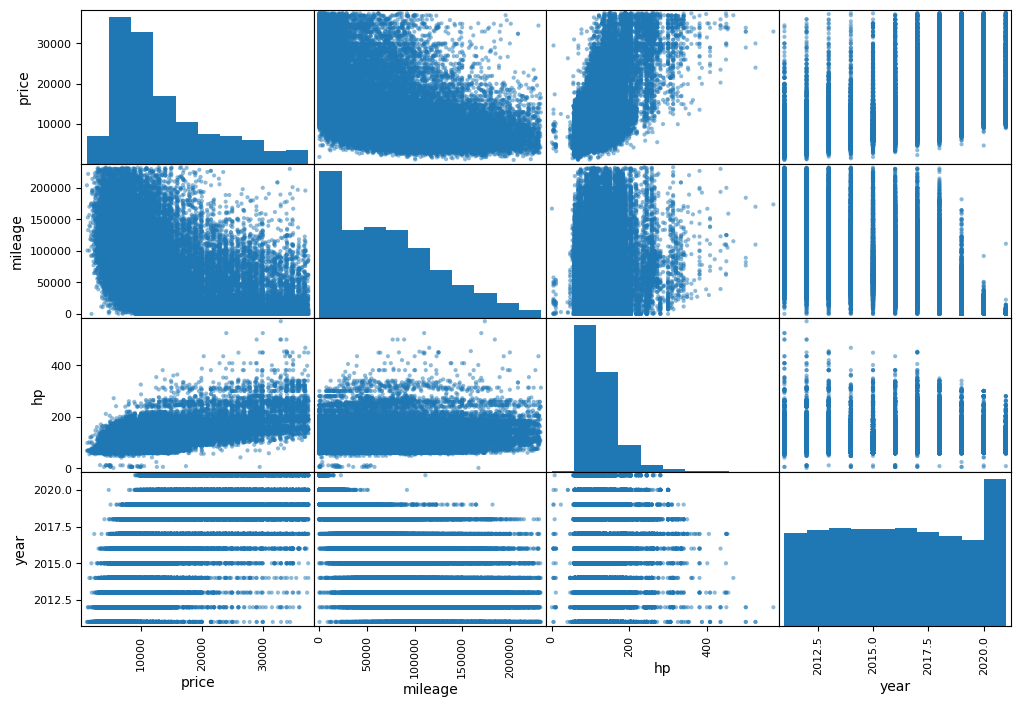

In [127]:
attributes = ['price','mileage','hp', 'year']
scatter_matrix(cars_2[attributes], figsize=(12,8))
plt.show()

In [124]:
cars_2.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,40080.0,71584.789870,54778.931205,0.0,24675.5,64104.0,106500.0,232564.0
price,40080.0,13191.560753,7954.185759,1100.0,7390.0,10590.0,16970.0,37490.0
hp,40080.0,120.191916,48.829964,1.0,84.0,110.0,150.0,571.0
year,40080.0,2015.755065,3.059701,2011.0,2013.0,2016.0,2018.0,2021.0


# ML Pipeline

In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [133]:
# target var & features
y = cars["Price"]
X = cars.drop('Price', axis=1)

In [134]:
num_vars = ['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
cat_vars = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

In [132]:
y_2 = cars_2["price"]
X_2 = cars_2.drop('price', axis=1)

In [135]:
X_2.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'hp', 'year'], dtype='object')

In [136]:
num_vars_2 = ['mileage','hp', 'year']
cat_vars_2 = ['make', 'model', 'fuel', 'gear', 'offerType']

## Train Test Split

In [137]:
# Create transformers for encoding categorical variables and preprocessing numeric variables
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Create a pipeline with preprocessing and a regression model (e.g., Linear Regression)
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [146]:
# Create transformers for encoding categorical variables and preprocessing numeric variables
categorical_transformer_2 = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer_2 = Pipeline([
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_2, num_vars_2),
        ('cat', categorical_transformer_2, cat_vars_2)
    ])

# Create a pipeline with preprocessing and a regression model (e.g., Linear Regression)
regression_pipeline_2 = Pipeline([
    ('preprocessor', preprocessor_2),
    ('regressor', LinearRegression())
])

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4242)

In [139]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state = 4242)

## Basic SKLearn Regression models

In [140]:
# Fit the preprocessing pipeline to the training data and transform both training and testing data
regression_pipeline.fit(X_train, y_train)
y_pred = regression_pipeline.predict(X_test)

In [147]:
# Fit the preprocessing pipeline to the training data and transform both training and testing data
regression_pipeline_2.fit(X_train_2, y_train_2)
y_pred_2 = regression_pipeline_2.predict(X_test_2)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

64645535.39207414

In [ ]:
rmse = np.sqrt(mse)
rmse

8040.244734588254

In [149]:
rmse_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
rmse_2

2381.5259141249066

In [150]:
mae = mean_absolute_error(y_test, y_pred)
mae

6101.906397831917

In [151]:
mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mae_2

1754.455751567248

In [152]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

In [156]:
pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('model', Ridge())
])

In [153]:
# Fit the preprocessing pipeline to the training data and transform both training and testing data
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [158]:
# Fit the preprocessing pipeline to the training data and transform both training and testing data
pipeline_2.fit(X_train_2, y_train_2)
y_pred_2 = pipeline_2.predict(X_test_2)

In [154]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

7960.661140493488

In [159]:
rmse = np.sqrt( mean_squared_error(y_test_2, y_pred_2))
rmse

2381.3317999539845

## PyCaret

In [163]:
#!pip install pycaret

In [165]:
from pycaret.regression import *

In [168]:
# Encode categorical columns using one-hot encoding
cars_encoded = pd.get_dummies(cars, columns=cat_vars)
cars_2_encoded = pd.get_dummies(cars_2, columns=cat_vars_2)

In [171]:
reg = setup(
      data=cars,
      target="Price",
      numeric_imputation="mean",
      train_size=0.8,
)

,Description,Value
0,Session id,2617
1,Target,Price
2,Target type,Regression
3,Original data shape,"(14447, 18)"
4,Transformed data shape,"(14447, 56)"
5,Transformed train set shape,"(11557, 56)"
6,Transformed test set shape,"(2890, 56)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,9


In [172]:
reg_2 = setup(
      data=cars_2,
      target="price",
      numeric_imputation="mean",
      train_size=0.8,
)

,Description,Value
0,Session id,3355
1,Target,price
2,Target type,Regression
3,Original data shape,"(40080, 9)"
4,Transformed data shape,"(40080, 24)"
5,Transformed train set shape,"(32064, 24)"
6,Transformed test set shape,"(8016, 24)"
7,Numeric features,3
8,Categorical features,5
9,Preprocess,True


In [173]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1259.3727,3430637.5563,1850.9749,0.9458,0.1401,0.1057,4.8110
lightgbm,Light Gradient Boosting Machine,1314.0322,3702566.5087,1923.2489,0.9415,0.1461,0.1108,1.5020
rf,Random Forest Regressor,1313.5093,3894121.5791,1972.8561,0.9385,0.1482,0.1104,12.1160
et,Extra Trees Regressor,1350.0034,4018225.5913,2004.1336,0.9365,0.1542,0.1148,9.0520
gbr,Gradient Boosting Regressor,1504.2430,4809050.6352,2192.0229,0.9241,0.1622,0.1251,4.0560
dt,Decision Tree Regressor,1747.6081,7088395.9885,2661.9193,0.8881,0.1991,0.1465,0.5410
ridge,Ridge Regression,1980.7152,7368627.1846,2713.9475,0.8837,0.3668,0.1832,0.5420
br,Bayesian Ridge,1980.6060,7366789.0354,2713.6070,0.8837,0.3671,0.1832,0.3540
llar,Lasso Least Angle Regression,1980.6659,7367607.7768,2713.7563,0.8837,0.3667,0.1832,0.5520
lasso,Lasso Regression,1980.6562,7367551.4678,2713.7457,0.8837,0.3667,0.1832,1.0690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=3355, ...)

### Best PyCaret comparison to Sklearn

In [174]:
from sklearn.tree import DecisionTreeRegressor

In [175]:
regression_pipeline_dtr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5))
])

In [182]:
# Fit the preprocessing pipeline to the training data and transform both training and testing data
regression_pipeline_dtr.fit(X_train, y_train)
y_pred = regression_pipeline_dtr.predict(X_test)

In [183]:
y_pred = regression_pipeline_dtr.predict(X_test)

In [185]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

7841.537213044521

### XGBoost comparison (AutoScout24)

In [199]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [272]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
df_2_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Car Price Predictor/datasets/cleaned_df.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [203]:
lblc = LabelEncoder()
for col in cat_vars_2:
    cars_2[col] = lblc.fit_transform(cars_2[col])

In [302]:
cars_2

,mileage,make,model,fuel,gear,offerType,price,hp,year
1,12852,54,320,6,1,4,6877,60,0
2,16629,47,278,6,1,4,6900,86,0
3,13194,46,405,6,1,4,6950,51,0
4,16884,43,29,6,1,4,6950,83,0
5,16529,53,112,4,0,4,6950,43,0
...,...,...,...,...,...,...,...,...,...
46394,10,11,147,6,1,3,12340,23,10
46396,66,19,49,4,1,3,12490,22,10
46397,143,19,49,4,1,0,12805,21,10
46398,170,19,445,4,1,0,12805,21,10


In [205]:
y_2 = cars_2.price
X_2 = cars_2.drop("price", axis=1)

In [206]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state = 4242)

In [207]:
xgb_model = xgb.XGBRegressor()

In [208]:
xgb_model.fit(X_train_2, y_train_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [212]:
y_pred_2 = xgb_model.predict(X_test_2)

In [214]:
rmse_xgb = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
rmse_xgb

1843.203643836076

### XGboost hyperparam tuning

In [223]:
from sklearn.model_selection import GridSearchCV

In [224]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [225]:
xgb1 = xgb.XGBRegressor()

In [226]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train_2, y_train_2)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[10:16:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[10:16:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [227]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.947676531646825
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [229]:
best_params = xgb_grid.best_params_

In [230]:
best_params

{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [234]:
xgb_best = XGBRegressor(n_jobs = 5,
                        verbose=True,
                        **best_params)

In [235]:
xgb_best.fit(X_train_2, y_train_2)

[11:22:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[11:22:27] WARNING: ../src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=5, nthread=4, num_parallel_tree=None,
             objective='reg:linear', ...)

In [237]:
y_pred_2 = xgb_best.predict(X_test_2)

In [238]:
rmse_xgb_best = np.sqrt(mean_squared_error(y_test_2, y_pred_2))
rmse_xgb_best

1752.368731040373

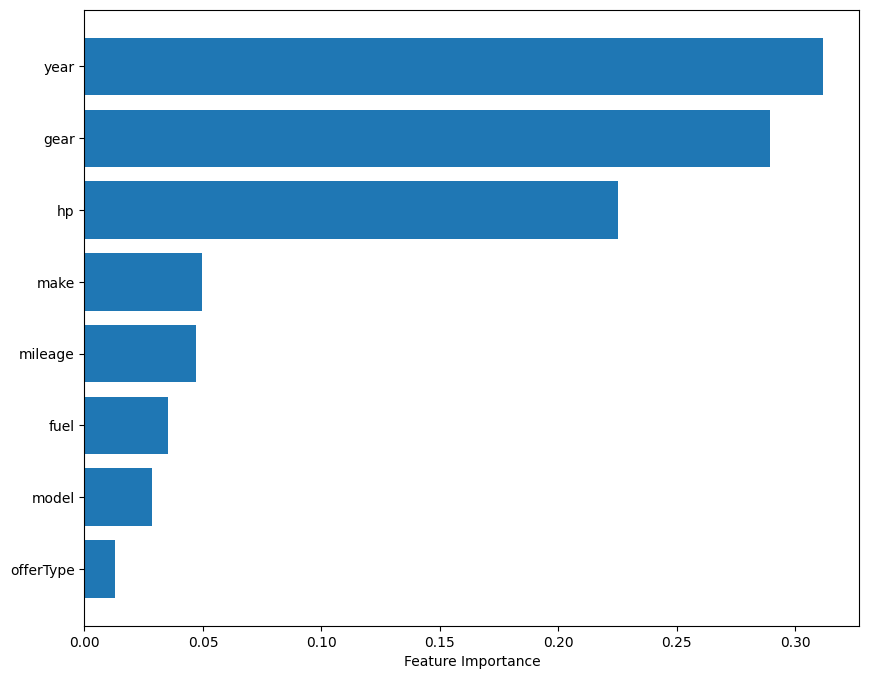

In [249]:
# Get feature importance data
importance = xgb_best.feature_importances_

# Sort feature importances
sorted_idx = importance.argsort()

# Plot
plt.figure(figsize=(10, len(sorted_idx)))
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [xgb_best.get_booster().feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

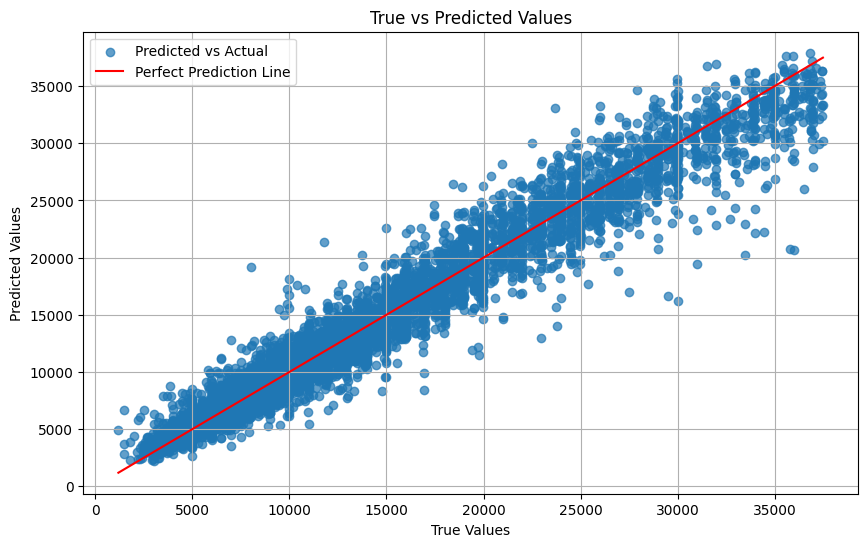

In [253]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_2, y_pred_2, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test_2), max(y_test_2)], [min(y_test_2), max(y_test_2)], color='red', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [241]:
with open("xgboost_regressor.pkl", "wb") as f:
  pickle.dump(xgb_best, f)

In [242]:
from google.colab import files
files.download("xgboost_regressor.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [275]:
xgb_best.save_model('xgboost_best_regressor.json')

In [277]:
files.download("xgboost_best_regressor.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [279]:
# Mount Google Drive
drive.mount('/content/drive')
cars_2.to_csv('/content/drive/MyDrive/Colab Notebooks/Car Price Predictor/datasets/cars_AS24.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


90200	Renault	Megane	Gasoline	Manual	Used	110.0	2013

In [280]:
cars_2.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

In [300]:
car_to_predict = {"mileage":90200, "make":"Renault", "model":"Megane", "fuel":"Gasoline", "gear":"Manual", "offerType":"Used", "hp":110, "year":2013 }
car_to_predict_df = pd.DataFrame([car_to_predict])
lblc = LabelEncoder()
for col in car_to_predict_df[cat_vars_2]:
  car_to_predict_df[col] = lblc.fit_transform(car_to_predict_df[col])

In [301]:
car_to_predict_df

,mileage,make,model,fuel,gear,offerType,hp,year
0,90200,0,0,0,0,0,110,2013


# Deep Learning


In [215]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [216]:
# Create and configure the MLPRegressor
regression_pipeline_mlp = Pipeline([
    ('preprocessor', preprocessor),
    ( 'regressor', MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16, 8),  # Two hidden layers with 64 and 32 neurons
    activation='relu',            # Activation function for hidden layers
    solver='adam',                # Optimization algorithm
    max_iter=500,                 # Maximum number of iterations (epochs)
    random_state=42))])

In [217]:
regression_pipeline_mlp.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Levy', 'Prod. year',
                                                   'Engine volume', 'Mileage',
                                                   'Cylinders', 'Airbags']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Manufacturer', 'Model',
                                                   'Category',
                                                   'Leather interior',
                                                   'Fuel type', 'Gear box type',
                                                   'Drive wheels', 'Wheel',
                                                   'Color', 'Turbo'])])),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16, 8),
                              max_iter=500, random_state=42))])

In [218]:
# Predict using the trained model
y_pred = regression_pipeline_mlp.predict(X_test)

In [219]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [220]:
rmse

6924.185650544546

### AS24 data MLP

In [254]:
y_3 = cars_2["price"]
X_3 = cars_2.drop('price', axis=1)

In [255]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state = 4242)

In [256]:
# Create and configure the MLPRegressor
regression_pipeline_mlp2 = Pipeline([
    ('preprocessor', preprocessor_2),
    ( 'regressor', MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16, 8),  # Two hidden layers with 64 and 32 neurons
    activation='relu',            # Activation function for hidden layers
    solver='adam',                # Optimization algorithm
    max_iter=500,                 # Maximum number of iterations (epochs)
    random_state=42))])

In [262]:
regression_pipeline_mlp2.fit(X_train_3, y_train_3)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'hp', 'year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'model', 'fuel',
                                                   'gear', 'offerType'])])),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16, 8),
                              max_iter=500, random_state=42))])

In [263]:
# Predict using the trained model
y_pred_3 = regression_pipeline_mlp2.predict(X_test_3)

In [265]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test_3, y_pred_3)
mae = mean_absolute_error(y_test_3, y_pred_3)
r2 = r2_score(y_test_3, y_pred_3)
rmse = np.sqrt(mse)
rmse

1777.6831951946047